<a href="https://colab.research.google.com/github/Jang-Uk-5362/data-science/blob/main/ex_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 공부에 따른 시간 점수

In [7]:
import sklearn
sklearn.__version__

'1.2.2'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("LinearRegressionData.csv")

In [9]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [29]:
# 독립변수, 종속변수 분리
X = dataset.iloc[:,:-1].values # 처음부터 마지막 열 직전까지 데이터 (독립변수)
y = dataset.iloc[:,-1].values # 마지막 열 데이터 (종속변수)

In [30]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [34]:
# 모델 만들기
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # 모델 생성(학습)

LinearRegression()

In [43]:
y_pred = reg.predict(X) # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'socre')

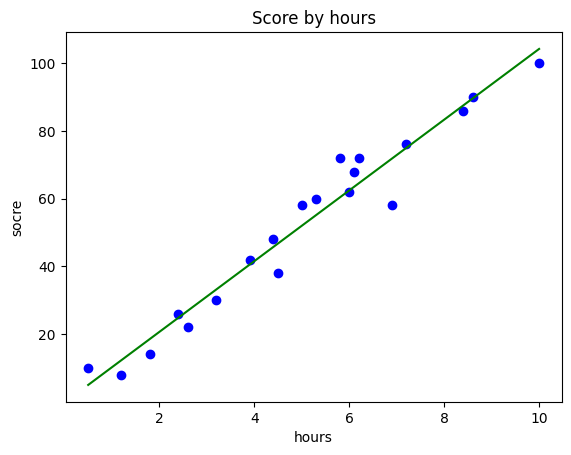

In [47]:
# 시각화
plt.scatter(X,y,color = 'blue')
plt.plot(X,y_pred, color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('socre')

In [50]:
print('9시간 공부했을때 예상 점수 : ', reg.predict([[9]])) # 2차원 배열 괄호 두번 [[]]

9시간 공부했을때 예상 점수 :  [93.77478776]


In [52]:
reg.coef_ # 기울기(m)

array([10.44369694])

In [54]:
reg.intercept_ # y 절편

-0.218484702867201

In [61]:
# y = mx + b
y = 10.44369694*9 + -0.218484702867201
y

93.7747877571328

In [62]:
### 데이터 세트 분리
# train set , test set

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
dataset = pd.read_csv("LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [69]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# 훈련 80, 테스트 20

In [77]:
len(X_train),X_train

(16,
 array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]))

In [78]:
len(X_test), X_test

(4,
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [79]:
y_train, len(y_train)


(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [80]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

In [ ]:
# 분리된 dataset으로 모델링

In [82]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [83]:
reg.fit(X_train,y_train) # 훈련세트로 모델이 학습

LinearRegression()

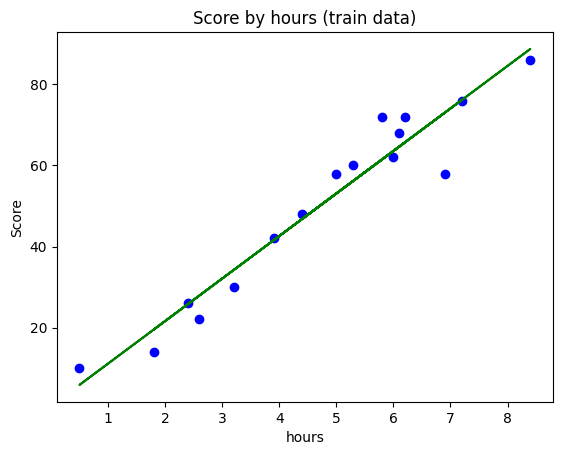

In [88]:
# 데이터 시각화(훈련data)
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,reg.predict(X_train), color = 'green')
plt.title("Score by hours (train data)")
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

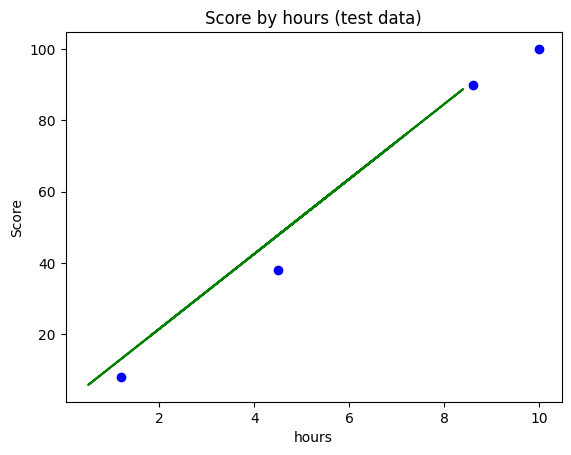

In [90]:
# 데이터 시각화(test data)
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,reg.predict(X_train), color = 'green')
plt.title("Score by hours (test data)")
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()


In [92]:
reg.coef_,reg.intercept_


(array([10.49161294]), 0.6115562905169369)

In [ ]:
# 모델 평가

In [93]:
reg.score(X_test,y_test)

0.9727616474310156

In [94]:
reg.score(X_train,y_train)

0.9356663661221668

In [ ]:
# 경사 하강법 (Gradient Descent)
# - learning late
# - epoch

In [119]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent(확률적 경사 하강법)
sr = SGDRegressor(max_iter = 500, eta0=0.0001,random_state=0, )
sr.fit(X_train, y_train) # 모델 생성
# max_iter = epoch
# eta0 = learning late

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=500, random_state=0)

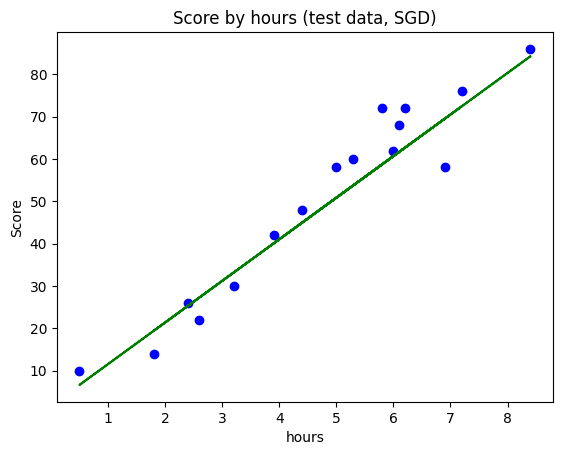

In [118]:
# 데이터 시각화(test data)
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,sr.predict(X_train), color = 'green')
plt.title("Score by hours (test data, SGD)")
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()


In [99]:
sr.coef_ , sr.intercept_

(array([10.3545645]), array([1.5707499]))

In [100]:
# 훈련 데이터와 SGD 비교
reg.coef_,reg.intercept_

(array([10.49161294]), 0.6115562905169369)

In [102]:
# 모델 평가
sr.score(X_test, y_test)

0.9708180682967456

In [103]:
sr.score(X_train, y_train)

0.9353218342594078